In [134]:
# Importing libraries 
import pandas as pd
import numpy as np

# Creating a dataframe df
df = pd.read_csv(r"C:\Users\ishas\Downloads\Telco-Customer-Churn Prediction.csv")

# View the first 10 rows
df.head(10)

,customerID,gender,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [126]:
# Basic info related to data types and many more
print(df.shape)
print()
df.info()
print()

# Checking missing values
df.isnull().sum()

# Changing Total charges to float64
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors= 'coerce')
print()
print(df['TotalCharges'].dtype)

print()
#Checking if there are any NAN and dropping them if any
print('Null values in TotalCharges:', df['TotalCharges'].isnull().sum())
df = df.dropna(subset=['TotalCharges'])

df.describe()


(7032, 21)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     0 non-null      object 
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-nul

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


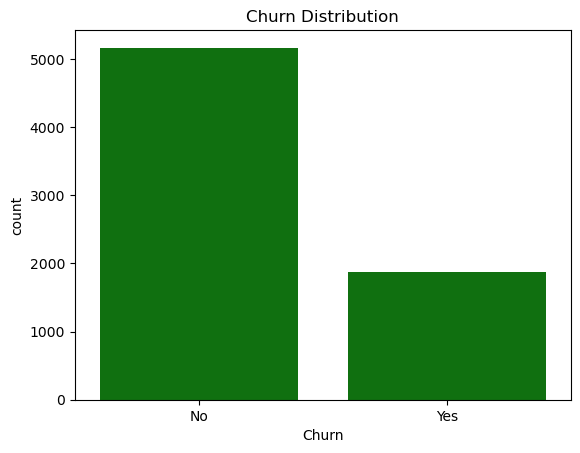

Churn
No     0.734215
Yes    0.265785
Name: proportion, dtype: float64
          tenure  MonthlyCharges  TotalCharges
Churn                                         
No     37.650010       61.307408   2555.344141
Yes    17.979133       74.441332   1531.796094


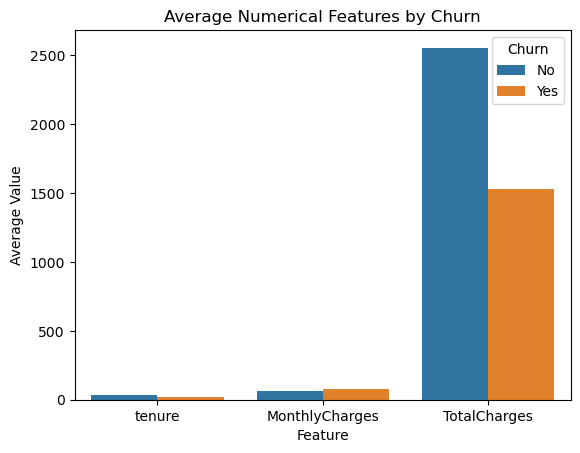

In [88]:
# Churn Distribution in numerical cols

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='Churn', color='green')
plt.title("Churn Distribution")
plt.show()

# Churn value counts
print(df['Churn'].value_counts(normalize=True))

# Mean comparison
print(df.groupby('Churn')[['tenure', 'MonthlyCharges', 'TotalCharges']].mean())

# Barplot version
avg_metrics = df.groupby('Churn')[['tenure', 'MonthlyCharges', 'TotalCharges']].mean().reset_index().melt(id_vars='Churn')

sns.barplot(data=avg_metrics, x='variable', y='value', hue='Churn')
plt.title("Average Numerical Features by Churn")
plt.ylabel("Average Value")
plt.xlabel("Feature")
plt.show()


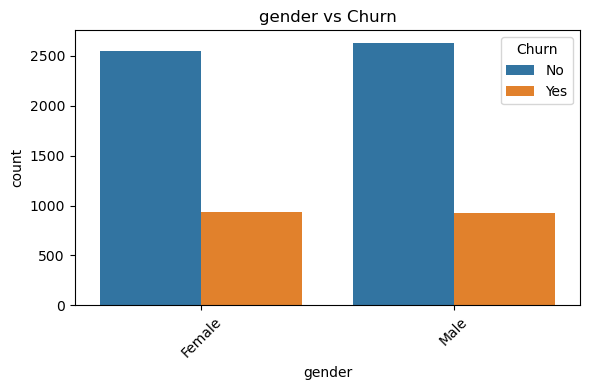

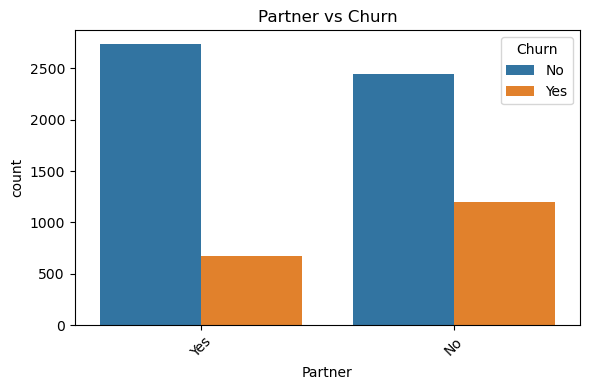

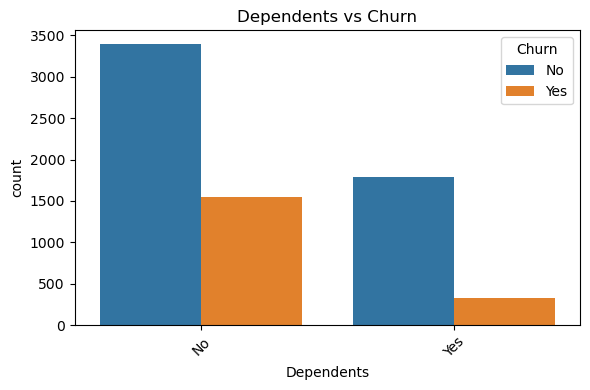

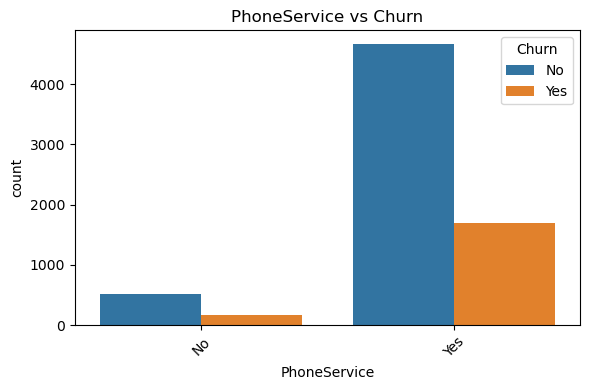

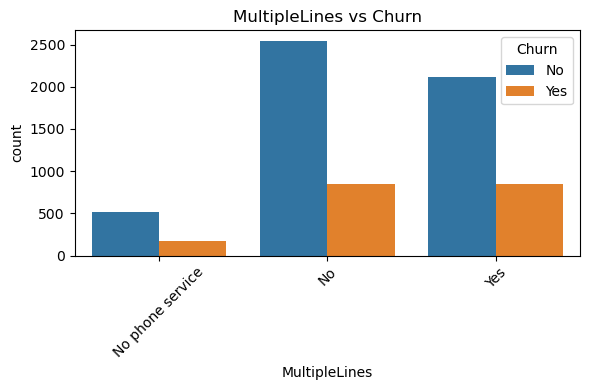

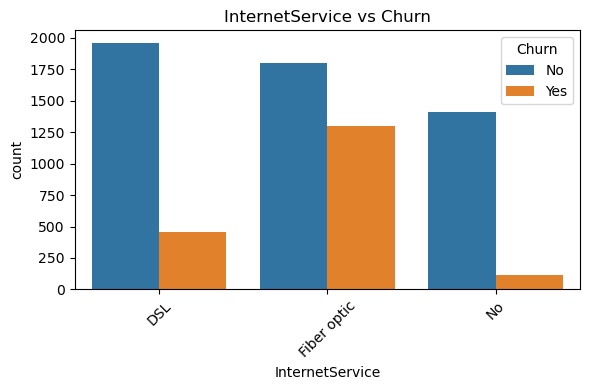

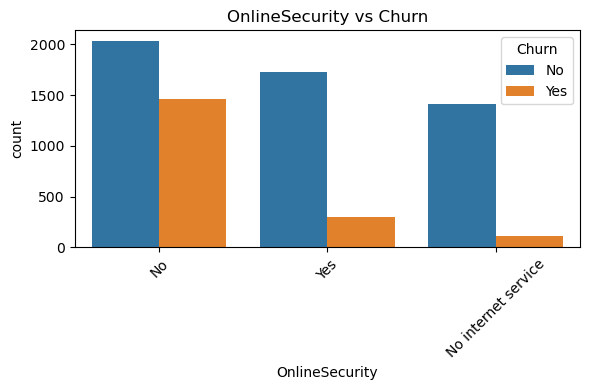

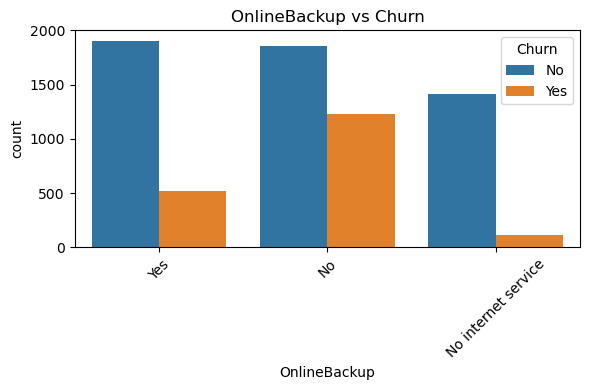

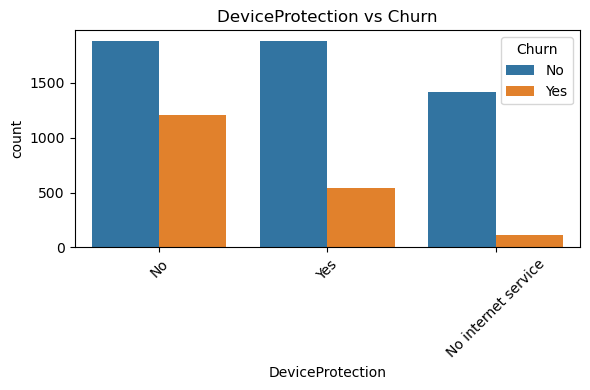

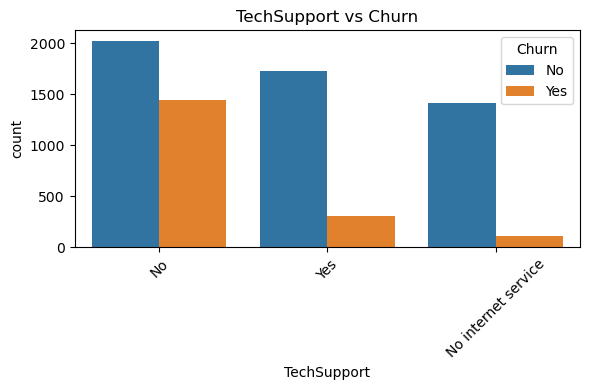

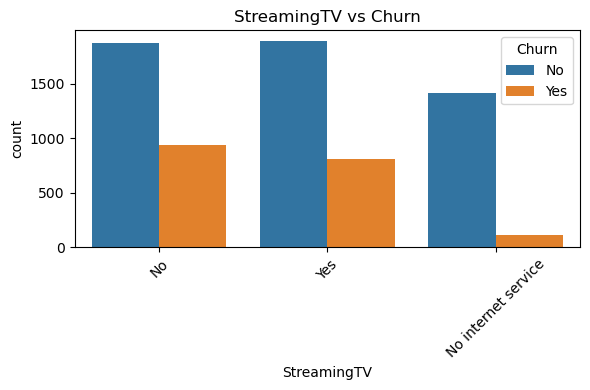

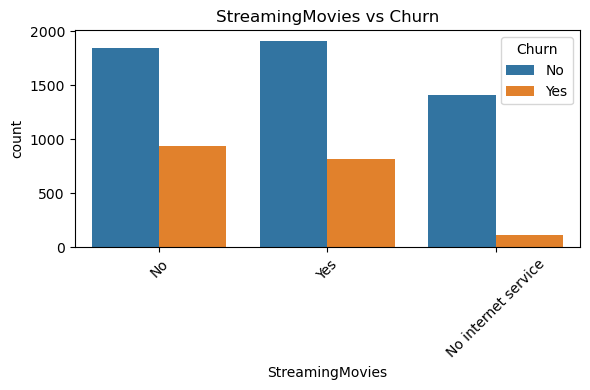

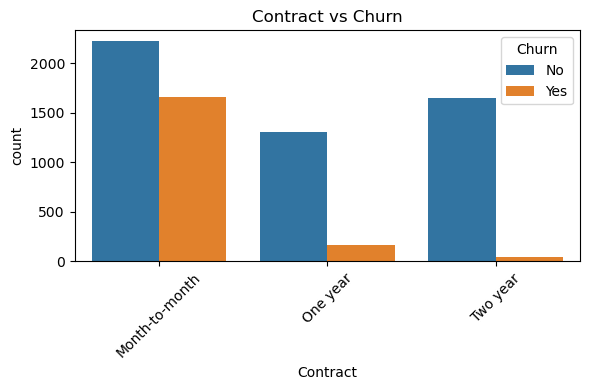

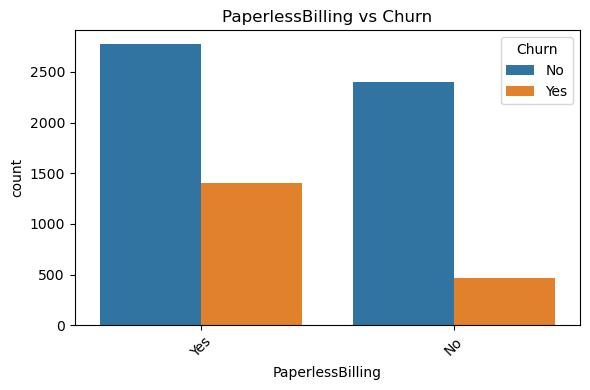

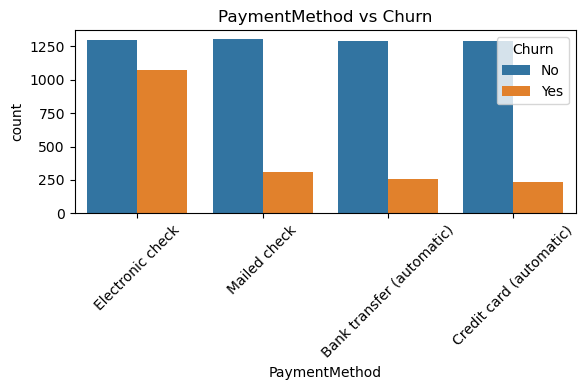

In [140]:
# Churn comparison with categorical cols

categorical_cols = ['gender','Partner', 'Dependents', 
                    'PhoneService', 'MultipleLines', 'InternetService', 
                    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                    'TechSupport', 'StreamingTV', 'StreamingMovies', 
                    'Contract', 'PaperlessBilling', 'PaymentMethod']

for i in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=i, hue='Churn')
    plt.title(f"{i} vs Churn")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [184]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 'Churn_Yes' is the target, 'customerID' can be dropped
df = df.drop('customerID', axis=1)

# Prepare features (X) and target (y)
X = df.drop('Churn_Yes', axis=1)
X = pd.get_dummies(X, drop_first=True)  # One-hot encoding
y = df['Churn_Yes']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression model
model = LogisticRegression(max_iter=1000, class_weight='balanced')
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.7736
Confusion Matrix:
[[798 238]
 [ 81 292]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.77      0.83      1036
           1       0.55      0.78      0.65       373

    accuracy                           0.77      1409
   macro avg       0.73      0.78      0.74      1409
weighted avg       0.81      0.77      0.78      1409

